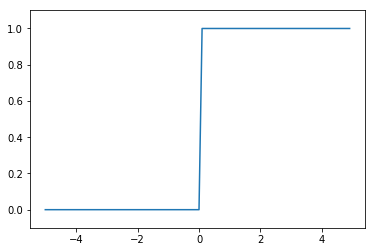

In [1]:
import numpy as np
import matplotlib.pylab as plt


def step_function(x):
    return np.array(x > 0, dtype=np.int)

X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([ 0.26894142,  0.73105858,  0.88079708])

In [4]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([ 2.,  3.,  4.])

In [5]:
1.0 / t

array([ 1.        ,  0.5       ,  0.33333333])

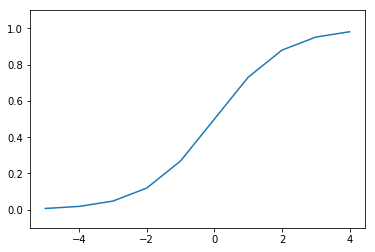

In [6]:
x = np.arange(-5.0, 5.0, 1.0)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

入力層에서 1層으로 信號 傳達

$$a_1^{(1)} = w_{11}^{(1)}x_1 + w_{12}^{(1)}x_2 + b_1^{(1)}$$

行列의 內積을 利用해 簡素化

$$ \textbf{A}^{(1)} = \textbf{XW}^{(1)} + \textbf{B}^{(1)} $$

In [8]:
# 入力層에서 1層으로 信號 傳達
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
A1

(2,)
(2, 3)
(3,)


array([ 0.3,  0.7,  1.1])

In [9]:
# 活性化 函數 處理
Z1 = sigmoid(A1)
Z1

array([ 0.57444252,  0.66818777,  0.75026011])

In [10]:
# 1層에서 2層으로 信號 傳達
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
A2

(3,)
(3, 2)
(2,)


array([ 0.51615984,  1.21402696])

In [11]:
Z2 = sigmoid(A2)
Z2

array([ 0.62624937,  0.7710107 ])

In [12]:
# 2層에서 出力層으로 信號 傳達
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
A3

array([ 0.31682708,  0.69627909])

In [13]:
def identity_func(x):
    return x

Y = identity_func(A3)
Y

array([ 0.31682708,  0.69627909])

In [14]:
# 具現 整理

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.5]]) # 2개의 입력에서 1층 
    network['b1'] = np.array([0.1, 0.2, 0.4])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_func(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[ 0.31708771  0.69686529]


**Softmax 公式**
$$y_k = \frac{\exp({a_k})}{\sum_{i=1}^{n} \exp({a_i})} $$

In [15]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[  1.34985881  18.17414537  54.59815003]
74.1221542102
[ 0.01821127  0.24519181  0.73659691]


In [16]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

**Enhanced Softmax 公式**

$$
\begin{equation}
\begin{split}
y_k & = \frac{\exp({a_k})}{\sum_{i=1}^{n} \exp({a_i})} = \frac{C\exp({a_k})}{C\sum_{i=1}^{n} \exp({a_i})}\\
& = \frac{\exp({a_k} + \log C)}{\sum_{i=1}^{n} \exp({a_i} + \log C)}\\
& = \frac{\exp({a_k} + C')}{\sum_{i=1}^{n} \exp({a_i} + C')}
\end{split}
\end{equation}
$$

In [17]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

/home/luno/.pyenv/versions/3.6.0/envs/jupyter-venv/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/home/luno/.pyenv/versions/3.6.0/envs/jupyter-venv/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


array([ nan,  nan,  nan])

In [18]:
c = np.max(a)
print(a - c)

np.exp(a - c) / np.sum(np.exp(a - c))

[  0 -10 -20]


array([  9.99954600e-01,   4.53978686e-05,   2.06106005e-09])

In [19]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [20]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)

[ 0.01821127  0.24519181  0.73659691]


1.0

## 3.6 手書き数字認識
### 3.6.1 データセット

In [21]:
# データのインポート
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(x_train.shape)
print(x_test.shape)
print(x_test.shape)

(60000, 784)
(60000, 784)
(10000, 784)
(10000, 784)


5
(784,)
(28, 28)


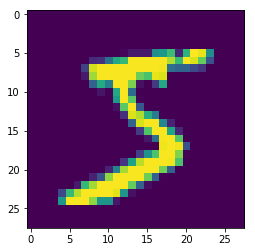

In [22]:
# MNISTの画像の読み込み。
from PIL import Image
from matplotlib.pyplot import imshow

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    imshow(np.asarray(pil_img))
    
img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

%matplotlib inline
img_show(img)

### 3.6.2 神經網의 推論處理

In [23]:
import pickle
def get_data():
    # 0〜255の値の範囲を0.0〜1.0に正規化させる
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    # 学習された重みパラメータをロード。
    with open("dataset/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

x, t = get_data()
network = init_network()
print(network['W1'].shape) # (784, 50) 1차원 배열로 reshape된 784(이미지의 크기 28x28)개의 입력, 첫번째 히든 레이어 50 
print(network['b1'].shape) # 첫번째 히든 레이어에 대한 가중치
print(network['W2'].shape) # (50, 100) 첫번째 히든 레이어 50개의 뉴런에서 두번째 히든 레이어 100개의 뉴런에 전달 
print(network['b2'].shape) # ... 이하 생략 
print(network['W3'].shape) # ...
print(network['b3'].shape) # ...

print ("x:", len(x), "t: ", len(t))
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

(784, 50)
(50,)
(50, 100)
(100,)
(100, 10)
(10,)
x: 10000 t:  10000
Accuracy:0.9352


### 3.6.3 配置 處理

In [24]:
# ニューラルネットワークの各レイヤの配列形状
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


In [25]:
# 배치 처리 
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

        
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
